**Purpose**: This notebook will format driver nationality data for use in a D3 bar plot visualisation of driver counts by nationality.

Data source: https://www.kaggle.com/rohanrao/formula-1-world-championship-1950-2020

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
drivers = pd.read_csv('./data/drivers.csv')
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


Next we will group the drivers by nationality using the groupby method in Pandas. At the same time we will sort the data so that countries with the most drivers will be at the top.

In [3]:
nationalities = drivers.groupby(['nationality']).count().reset_index().sort_values(by=['driverId'], ascending=False)
nationalities.head()

,nationality,driverId,driverRef,number,code,forename,surname,dob,url
8,British,165,165,165,165,165,165,165,165
0,American,157,157,157,157,157,157,157,156
23,Italian,99,99,99,99,99,99,99,99
17,French,73,73,73,73,73,73,73,73
18,German,49,49,49,49,49,49,49,49


The column names are now a little misleading, and only the first two columns are needed, so let's reduce the dataframe down to the first to columns and rename them.

In [4]:
nationalities = nationalities.iloc[:,:2]
nationalities.columns = ['nationality','count']
nationalities.head()

,nationality,count
8,British,165
0,American,157
23,Italian,99
17,French,73
18,German,49


Let's quickly have a test of what the data will look like in a bar plot. We're not worried about formatting, and titles etc. as this will be set in the d3 visualisation.

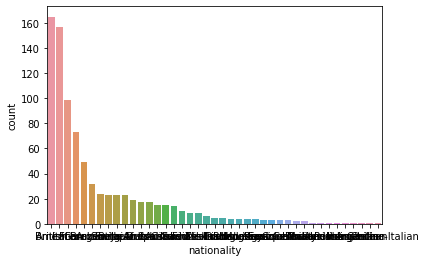

In [5]:
ax = sns.barplot(x="nationality", y="count", data=nationalities)

The plot looks like what is expected, so let's now write the data to csv, ready for plotting in d3.

In [6]:
nationalities.to_csv('./data/driver_nationalities.csv', index=False)